In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Exploratory Data Analysis (EDA)**

In [2]:
# Download data
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

# View multiple lines
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
# Checking information about columns, their types and the number of non-zero values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
# Statistical review of numerical variables
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [5]:
# Check for missing values
print(train.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [6]:
# Count the number of unique values for each column
unique_counts = train.nunique()
unique_percentage = (unique_counts / len(train)) * 100

unique_info = pd.DataFrame({'Unique Count': unique_counts, 'Unique Percentage': unique_percentage})
unique_info = unique_info.sort_values(by='Unique Percentage', ascending=False)

print(unique_info)

                                       Unique Count  Unique Percentage
id                                           140700         100.000000
Name                                            422           0.299929
CGPA                                            331           0.235252
Degree                                          115           0.081734
City                                             98           0.069652
Profession                                       64           0.045487
Age                                              43           0.030561
Sleep Duration                                   36           0.025586
Dietary Habits                                   23           0.016347
Work/Study Hours                                 13           0.009240
Financial Stress                                  5           0.003554
Study Satisfaction                                5           0.003554
Job Satisfaction                                  5           0.003554
Work P

At this stage, It is worth removing the columns: Name, CGPA, Degree, City, Profession. Because these columns have quite a large number of unique fields.

In [7]:
columns_to_check = train.iloc[:, 1:-1]
duplicates = columns_to_check.duplicated()
print(f"Number of duplicates (excluding first and last columns): {duplicates.sum()}")


Number of duplicates (excluding first and last columns): 0


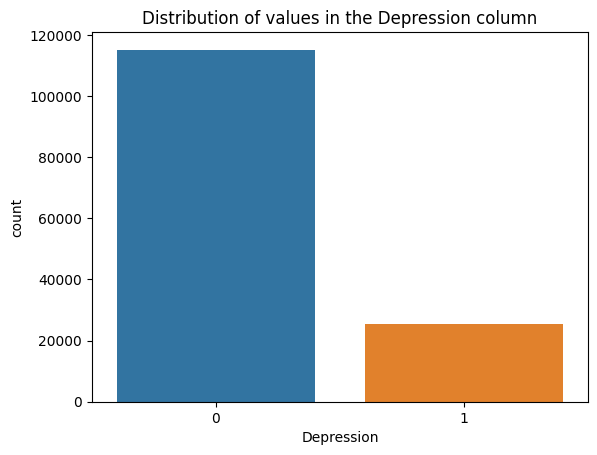

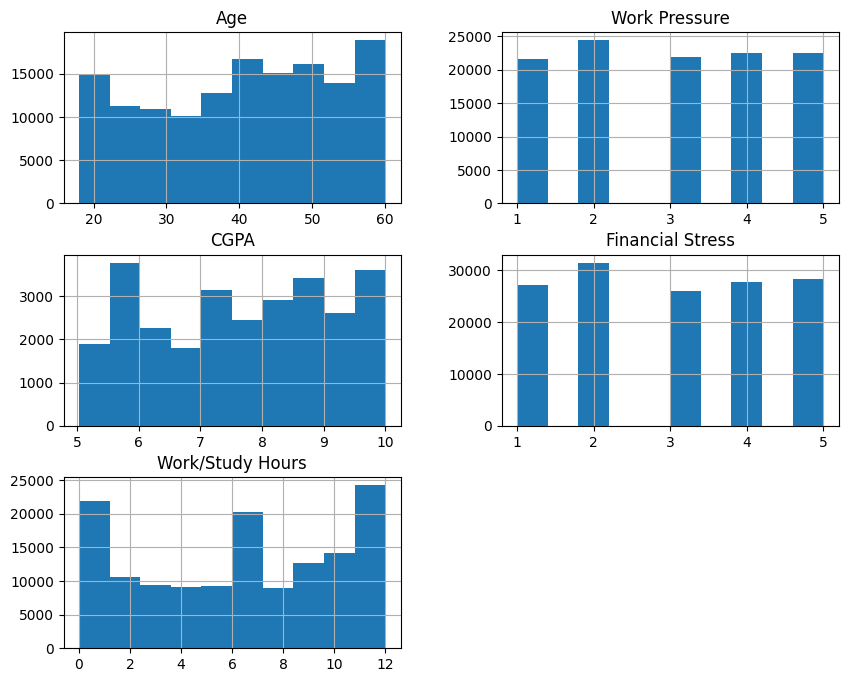

In [8]:
# Histogram for the target variable
sns.countplot(x='Depression', data=train)
plt.title('Distribution of values ​​in the Depression column')
plt.show()

# Histogram for numeric variables
train[['Age', 'Work Pressure', 'CGPA', 'Financial Stress', 'Work/Study Hours']].hist(figsize=(10, 8))
plt.show()

There are no anomalies.

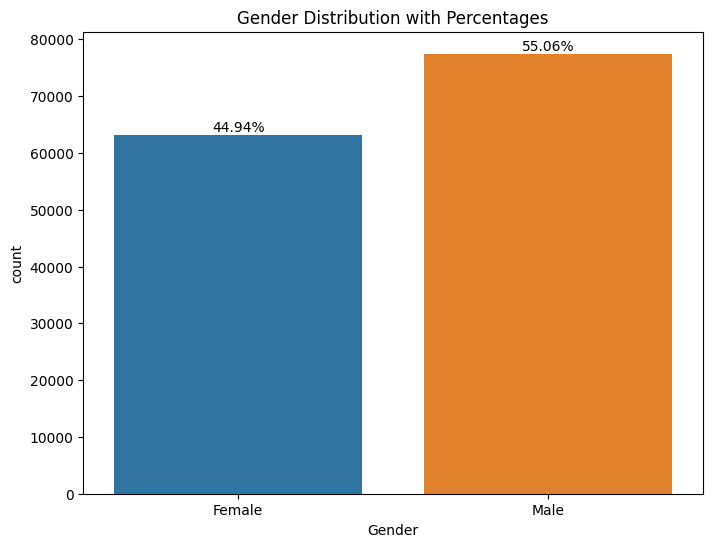

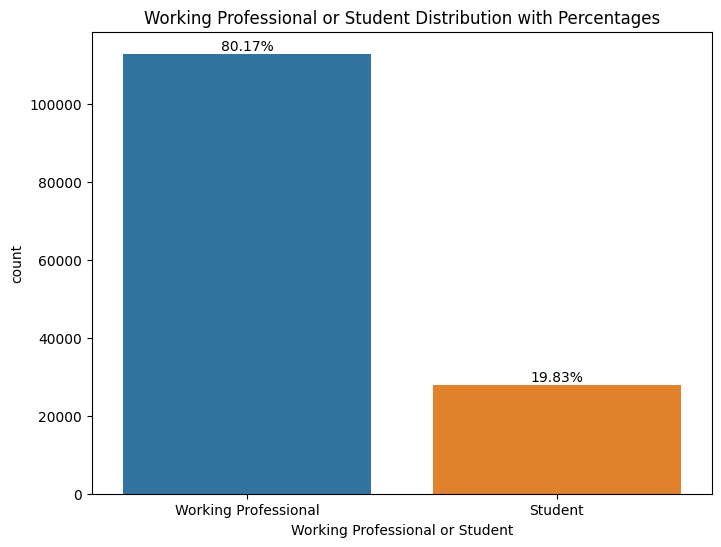

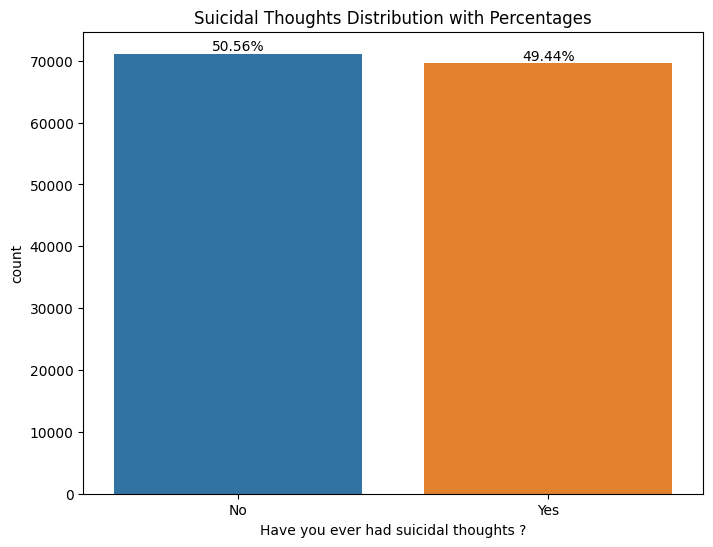

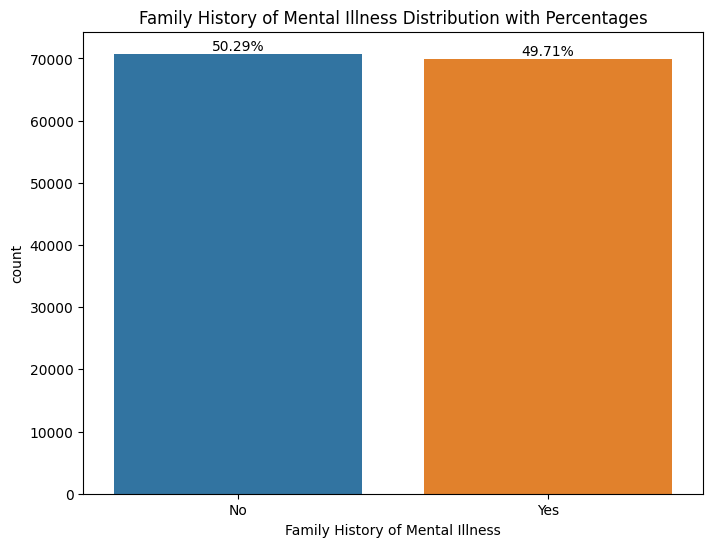

In [9]:
# Function to add interest
def add_percentage(ax, total):
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.2f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

# Bar plots for categorical variables
# 1. Gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=train)
add_percentage(ax, len(train))
plt.title('Gender Distribution with Percentages')
plt.show()

# 2. Working Professional or Student
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Working Professional or Student', data=train)
add_percentage(ax, len(train))
plt.title('Working Professional or Student Distribution with Percentages')
plt.show()

# 3. Suicidal Thoughts
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Have you ever had suicidal thoughts ?', data=train)
add_percentage(ax, len(train))
plt.title('Suicidal Thoughts Distribution with Percentages')
plt.show()

# 4. Family History of Mental Illness
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Family History of Mental Illness', data=train)
add_percentage(ax, len(train))
plt.title('Family History of Mental Illness Distribution with Percentages')
plt.show()


At this stage, It is worth removing the columns: Gender, Working Professional or Student, Have you ever had suicidal thoughts ?, Family History of Mental Illness. Because the ratio of opposite values ​​is almost equal

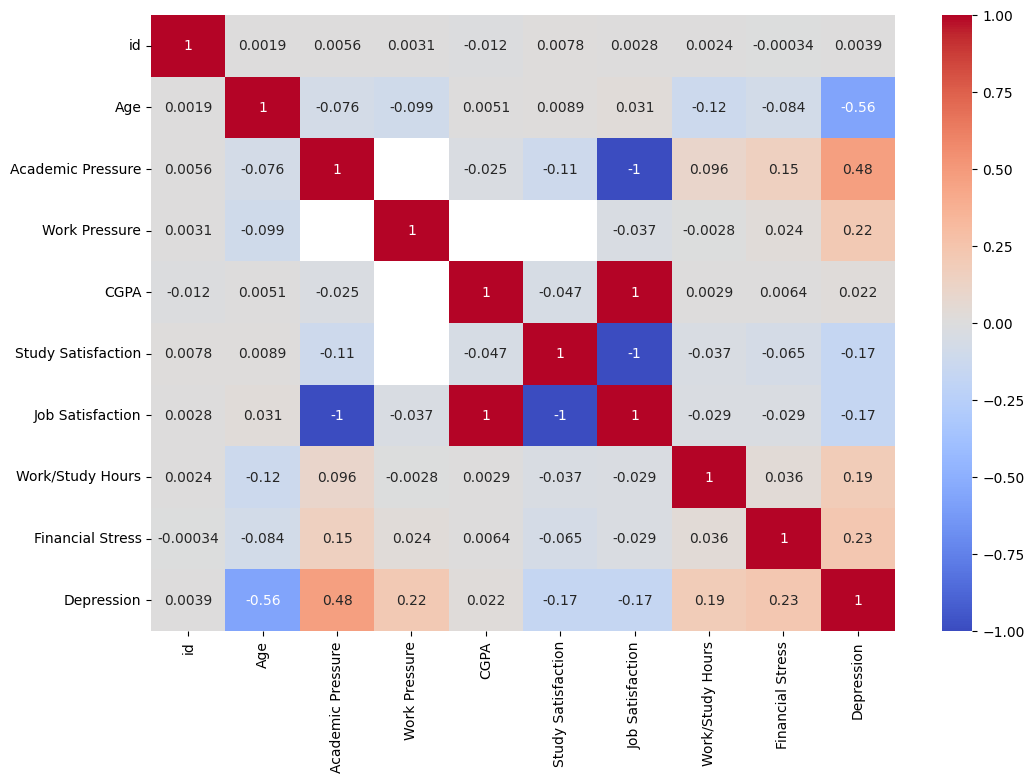

In [10]:
# Selecting only numeric columns
numeric_cols = train.select_dtypes(include=['number']).columns

# Correlation matrix for numerical variables
corr_matrix = train[numeric_cols].corr()

# Visualization of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



It is advisable to merge the columns "Study Satisfaction" and "Job Satisfaction," as well as "Academic Pressure" and "Work Pressure." These tables are complementary, meaning that if the value in the "Working Professional or Student" column is "Student," data will only be present in columns related to education, and similarly for employees, data will be present in columns related to work. However, not all students have data in the necessary columns, so missing values will be filled with the median. As a result, the five columns will be reduced to just two.

**Dataset Preparation**

In [11]:
# Combining Pressure and Satisfaction columns
train['Pressure'] = train['Academic Pressure'].fillna(train['Work Pressure'])
train['Satisfaction'] = train['Study Satisfaction'].fillna(train['Job Satisfaction'])

# Median for students
median_academic_pressure = train.loc[train['Working Professional or Student'] == 'Student', 'Academic Pressure'].median()
median_study_satisfaction = train.loc[train['Working Professional or Student'] == 'Student', 'Study Satisfaction'].median()

# Median for working professionals
median_work_pressure = train.loc[train['Working Professional or Student'] == 'Working Professional', 'Work Pressure'].median()
median_job_satisfaction = train.loc[train['Working Professional or Student'] == 'Working Professional', 'Job Satisfaction'].median()

# Filling gaps in Pressure
def fill_pressure(row):
    if not pd.isnull(row['Pressure']):
        return row['Pressure']
    if row['Working Professional or Student'] == 'Student':
        return row['Academic Pressure'] if not pd.isnull(row['Academic Pressure']) else median_academic_pressure
    else:
        return row['Work Pressure'] if not pd.isnull(row['Work Pressure']) else median_work_pressure

# Filling gaps in Satisfaction
def fill_satisfaction(row):
    if not pd.isnull(row['Satisfaction']):
        return row['Satisfaction']
    if row['Working Professional or Student'] == 'Student':
        return row['Study Satisfaction'] if not pd.isnull(row['Study Satisfaction']) else median_study_satisfaction
    else:
        return row['Job Satisfaction'] if not pd.isnull(row['Job Satisfaction']) else median_job_satisfaction

# Applying functions to data
train['Pressure'] = train.apply(fill_pressure, axis=1)
train['Satisfaction'] = train.apply(fill_satisfaction, axis=1)

# Fill in the blanks with the median for Financial Stress
median_financial_stress = train['Financial Stress'].median()
train['Financial Stress'].fillna(median_financial_stress, inplace=True)

# Filling CGPA: average for students, 0 for others
mean_cgpa_students = train.loc[train['Working Professional or Student'] == 'Student', 'CGPA'].mean()

def fill_cgpa(row):
    if not pd.isnull(row['CGPA']):
        return row['CGPA']
    if row['Working Professional or Student'] == 'Student':
        return mean_cgpa_students
    else:
        return 0

train['CGPA'] = train.apply(fill_cgpa, axis=1)

# Check the results
print(train.isnull().sum())
print(train[['Working Professional or Student', 'CGPA', 'Financial Stress', 'Pressure', 'Satisfaction']].head())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                          0
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
Pressure                                

In [12]:
# Removing unnecessary columns
train.drop(['Name', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 
            'Study Satisfaction', 'Job Satisfaction', 'Degree', 'Gender', 
            'Family History of Mental Illness', 'Work/Study Hours', 
            'Have you ever had suicidal thoughts ?', 'Sleep Duration', 
            'Dietary Habits', 'Working Professional or Student'], axis=1, inplace=True)

In [13]:
# Output of final data information
print(train.isnull().sum())
print(train.info())

id                  0
Age                 0
CGPA                0
Financial Stress    0
Depression          0
Pressure            0
Satisfaction        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                140700 non-null  int64  
 1   Age               140700 non-null  float64
 2   CGPA              140700 non-null  float64
 3   Financial Stress  140700 non-null  float64
 4   Depression        140700 non-null  int64  
 5   Pressure          140700 non-null  float64
 6   Satisfaction      140700 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 7.5 MB
None


In [14]:
# === APPLYING SAME TRANSFORMATIONS TO TEST DATA ===

# Step 1: Combining "Pressure" and "Satisfaction" columns in test data
test['Pressure'] = test['Academic Pressure'].fillna(test['Work Pressure'])
test['Satisfaction'] = test['Study Satisfaction'].fillna(test['Job Satisfaction'])

# Step 2: Filling gaps in "Pressure" and "Satisfaction" based on student/professional group
def fill_pressure_test(row):
    if not pd.isnull(row['Pressure']):
        return row['Pressure']
    if row['Working Professional or Student'] == 'Student':
        return row['Academic Pressure'] if not pd.isnull(row['Academic Pressure']) else median_academic_pressure
    else:
        return row['Work Pressure'] if not pd.isnull(row['Work Pressure']) else median_work_pressure

def fill_satisfaction_test(row):
    if not pd.isnull(row['Satisfaction']):
        return row['Satisfaction']
    if row['Working Professional or Student'] == 'Student':
        return row['Study Satisfaction'] if not pd.isnull(row['Study Satisfaction']) else median_study_satisfaction
    else:
        return row['Job Satisfaction'] if not pd.isnull(row['Job Satisfaction']) else median_job_satisfaction

# Apply transformations to test data
test['Pressure'] = test.apply(fill_pressure_test, axis=1)
test['Satisfaction'] = test.apply(fill_satisfaction_test, axis=1)

# Step 3: Filling "Financial Stress" in test data
test['Financial Stress'].fillna(median_financial_stress, inplace=True)

# Step 4: Filling "CGPA" in test data
def fill_cgpa_test(row):
    if not pd.isnull(row['CGPA']):
        return row['CGPA']
    if row['Working Professional or Student'] == 'Student':
        return mean_cgpa_students
    else:
        return 0

test['CGPA'] = test.apply(fill_cgpa_test, axis=1)

# Step 5: Removing unnecessary columns in test data
columns_to_drop = ['Name', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 
                   'Study Satisfaction', 'Job Satisfaction', 'Degree', 'Gender', 
                   'Family History of Mental Illness', 'Work/Study Hours', 
                   'Have you ever had suicidal thoughts ?', 'Sleep Duration', 
                   'Dietary Habits', 'Working Professional or Student']

test.drop(columns=columns_to_drop, axis=1, inplace=True)

# === VALIDATING THE FINAL TEST DATA ===
print(test.isnull().sum())  # Check for missing values in the test data
print(test.info())          # Display test data structure and column types


id                  0
Age                 0
CGPA                0
Financial Stress    0
Pressure            0
Satisfaction        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                93800 non-null  int64  
 1   Age               93800 non-null  float64
 2   CGPA              93800 non-null  float64
 3   Financial Stress  93800 non-null  float64
 4   Pressure          93800 non-null  float64
 5   Satisfaction      93800 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.3 MB
None
